# Content and Objective

+ Show estimation of psd w. Bartlett
+ Method: Get noise, filtered noise and sinusoid, and perform psd estimation

In [13]:
# importing
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [14]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

# Helper Functions

In [15]:
########################
# periodogram estimator
########################
def find_periodogram(y):
    """
    estimates periodogram via FFT
    
    IN: observation y
    OUT: psd estimator
    """
    N = len(y)
        
    per = ( np.abs(np.fft.fft(y))**2 )/ N
    per = np.fft.fftshift(per)
    
    return per  


########################
# Bartlett periodogram estimator
########################
def find_bartlett_estimate( y, M):
    """
    estimates periodogram out of the given observation
    using Bartlett's method
    
    IN: observation y, group size M
    OUT: psd estimator
    """
    
    N = len(y)
    K = int( float(N)/M )

    y_sliced = y.reshape( (K,M) )
    bartlett = ( np.abs(np.fft.fft(y_sliced,axis=1))**2)/M
    bartlett = np.mean(bartlett,axis=0)

    bartlett = np.fft.fftshift(bartlett)
    
    return bartlett

# Parameters

In [16]:
# parameters: number of samples and according length of acf
N = int( 1e3 )
#N = int( 1e4 )
N_range = np.arange( 0, N )

# width of segments
#M = N // 10
M = N // 100
#Number of segments
K = int( float(N)/M )

# number of realizations for averaging    
N_real = int( 1e2 )


# filtering noise?!
filtered = 0
#filtered = 1

# Loop for realizations

In [17]:
# initialize arrays for psd
psd_noise_per = np.empty( [ N_real, N ], dtype=float )
psd_noise_bart = np.empty( [ N_real, M ], dtype=float )

psd_sin_per = np.empty( [ N_real, N ], dtype=float )
psd_sin_bart = np.empty( [ N_real, M ], dtype=float )

# avtivate parameter "filtered" in parameters if you like to see filtered noise
if filtered == 1:
    # filter parameters
    cutoff_freq = 1.0/4.0

    ripple_db = 60                      # ripples and transition width of the filter
    width = 1 / 5.0

    N_filter, beta = signal.kaiserord(ripple_db, width)    # find filter order and beta parameter
    
    taps = signal.firwin( N_filter, cutoff=cutoff_freq,  window=('kaiser', beta))

    
# loop for realizations
for _k in range( N_real ):
    
    # generate noise
    noise = np.sqrt(2) * np.random.normal( 0.0, 1.0, N )

    # activate to have filtered noise
    if filtered == 1:
        noise = signal.lfilter( taps, 1.0, noise )   
        noise /= np.linalg.norm( noise )

    # find estimations
    psd_noise_per[ _k, :] = find_periodogram( noise )      
    psd_noise_bart[ _k, :] = find_bartlett_estimate( noise, M )


    Omega_0 = 1.0
    Omega_1 = 1.2
    y = np.sin( Omega_0 * N_range ) + np.sin( Omega_1 * N_range)  + np.random.normal(0.0, 1.0, size = N)

    psd_sin_per[ _k, :] = find_periodogram( y )      
    psd_sin_bart[ _k, :] = find_bartlett_estimate( y, M)        
        
        
        
# get mean and std along realizations
psd_noise_per_average = psd_noise_per.mean( axis=0 )  
psd_noise_per_tria_std = psd_noise_per.std( axis=0 )  

psd_noise_bart_average = psd_noise_bart.mean( axis=0 )   
psd_noise_bart_std = psd_noise_bart.std( axis=0 )   


psd_sin_per_average = psd_sin_per.mean( axis=0 )  
psd_sin_per_tria_std = psd_sin_per.std( axis=0 )  

psd_sin_bart_average = psd_sin_bart.mean( axis=0 )   
psd_sin_bart_std = psd_sin_bart.std( axis=0 )   


# Plotting

<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:47: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:47: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_3581/822901681.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{\Phi}_p(\Omega)$')
/tmp/ipykernel_3581/822901681.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{\Phi}_B(\Omega)$')
/tmp/ipykernel_3581/822901681.py:36: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{\Phi}_p(\Omega)$')
/tmp/ipykernel_3581/822901681.py:47: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{\Phi}_B(\Omega)$')


Text(0, 0.5, '$\\hat{\\Phi}_B(\\Omega)$')

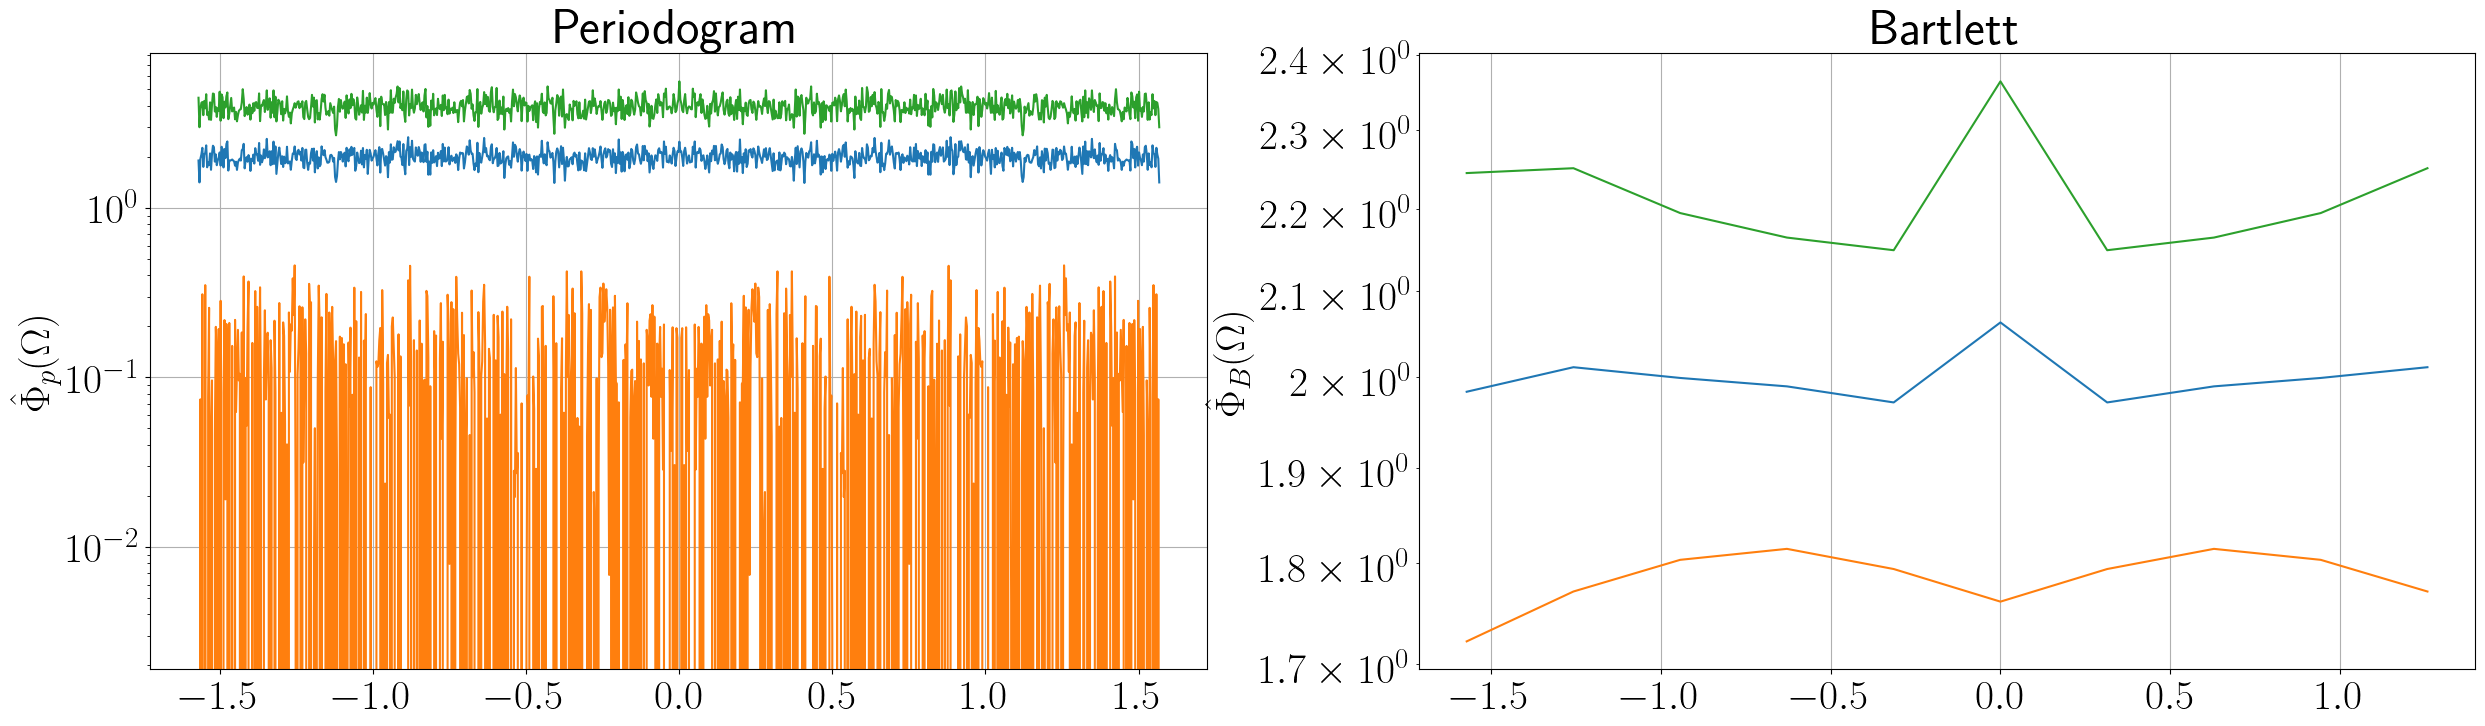

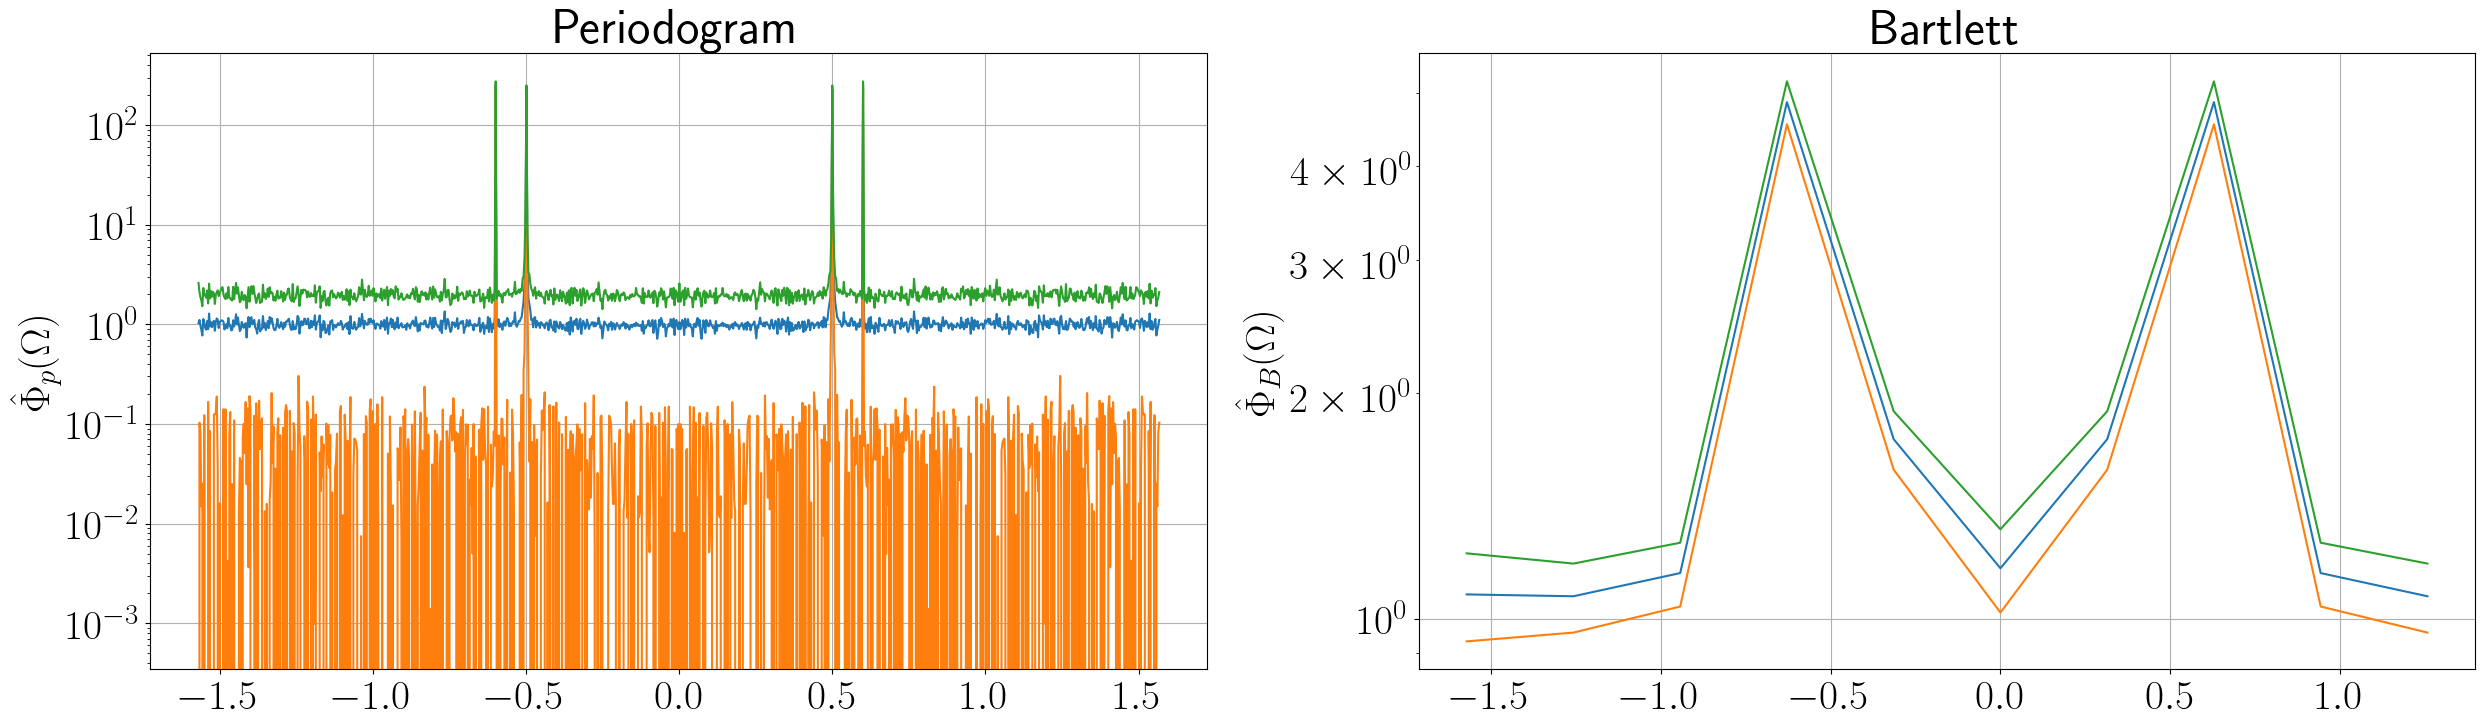

In [18]:
plt.figure()

plt.subplot(121)
Ome = (np.arange(psd_noise_per_average.size)-psd_noise_per_average.size//2)*np.pi/psd_noise_per_average.size
plt.semilogy(Ome, psd_noise_per_average)      
plt.semilogy(Ome, psd_noise_per_average - psd_noise_per_tria_std)          
plt.semilogy(Ome, psd_noise_per_average + psd_noise_per_tria_std)  

plt.title('Periodogram')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_p(\Omega)$')   


plt.subplot(122)    
Ome = (np.arange(psd_noise_bart_average.size)-psd_noise_bart_average.size//2)*np.pi/psd_noise_bart_average.size
plt.semilogy(Ome, psd_noise_bart_average)      
plt.semilogy(Ome, psd_noise_bart_average - psd_noise_bart_std)          
plt.semilogy(Ome, psd_noise_bart_average + psd_noise_bart_std)  

plt.title('Bartlett')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_B(\Omega)$')   



plt.figure()

plt.subplot(121)    
Ome = (np.arange(psd_sin_per_average.size)-psd_sin_per_average.size//2)*np.pi/psd_sin_per_average.size
plt.semilogy(Ome, psd_sin_per_average)      
plt.semilogy(Ome, psd_sin_per_average - psd_sin_per_tria_std)          
plt.semilogy(Ome, psd_sin_per_average + psd_sin_per_tria_std)  

plt.title('Periodogram')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_p(\Omega)$')   


plt.subplot(122)    
Ome = (np.arange(psd_sin_bart_average.size)-psd_sin_bart_average.size//2)*np.pi/psd_sin_bart_average.size
plt.semilogy(Ome, psd_sin_bart_average)      
plt.semilogy(Ome, psd_sin_bart_average - psd_sin_bart_std)          
plt.semilogy(Ome, psd_sin_bart_average + psd_sin_bart_std)  

plt.title('Bartlett')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_B(\Omega)$')   